# Проект 3. Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание данных**

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

**Цель исследования** — выяснить:
1. Как быстро продавались квартиры?
2. Какие факторы больше всего влияют на общую (полную) стоимость объекта?
3. Среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
4. Среднюю цену каждого километра в расстоянии до центра среди квартир в Санкт-Петербурге.

**Ход исследования**

Данные о с информацией о клиентах получены из файла `real_estate_data.csv`. О качестве данных ничего не известно. Поэтому перед началом анализа понадобится обзор данных. 

Необходимо проверить данные на ошибки и на этапе предобработки исправить самые критичные из них. Затем, в таблицу нужно будет добавить столбцы с новыми параметрами. Это поможет выявить интересные особенности и зависимости, которые существуют на рынке недвижимости.
 
Таким образом, исследование пройдёт в пять этапов:
 1. Обзор данных.
 2. Предобработка данных.
 3. Добавление новых параметров.
 4. Исследовательский анализ данных.
 5. Общий вывод.

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

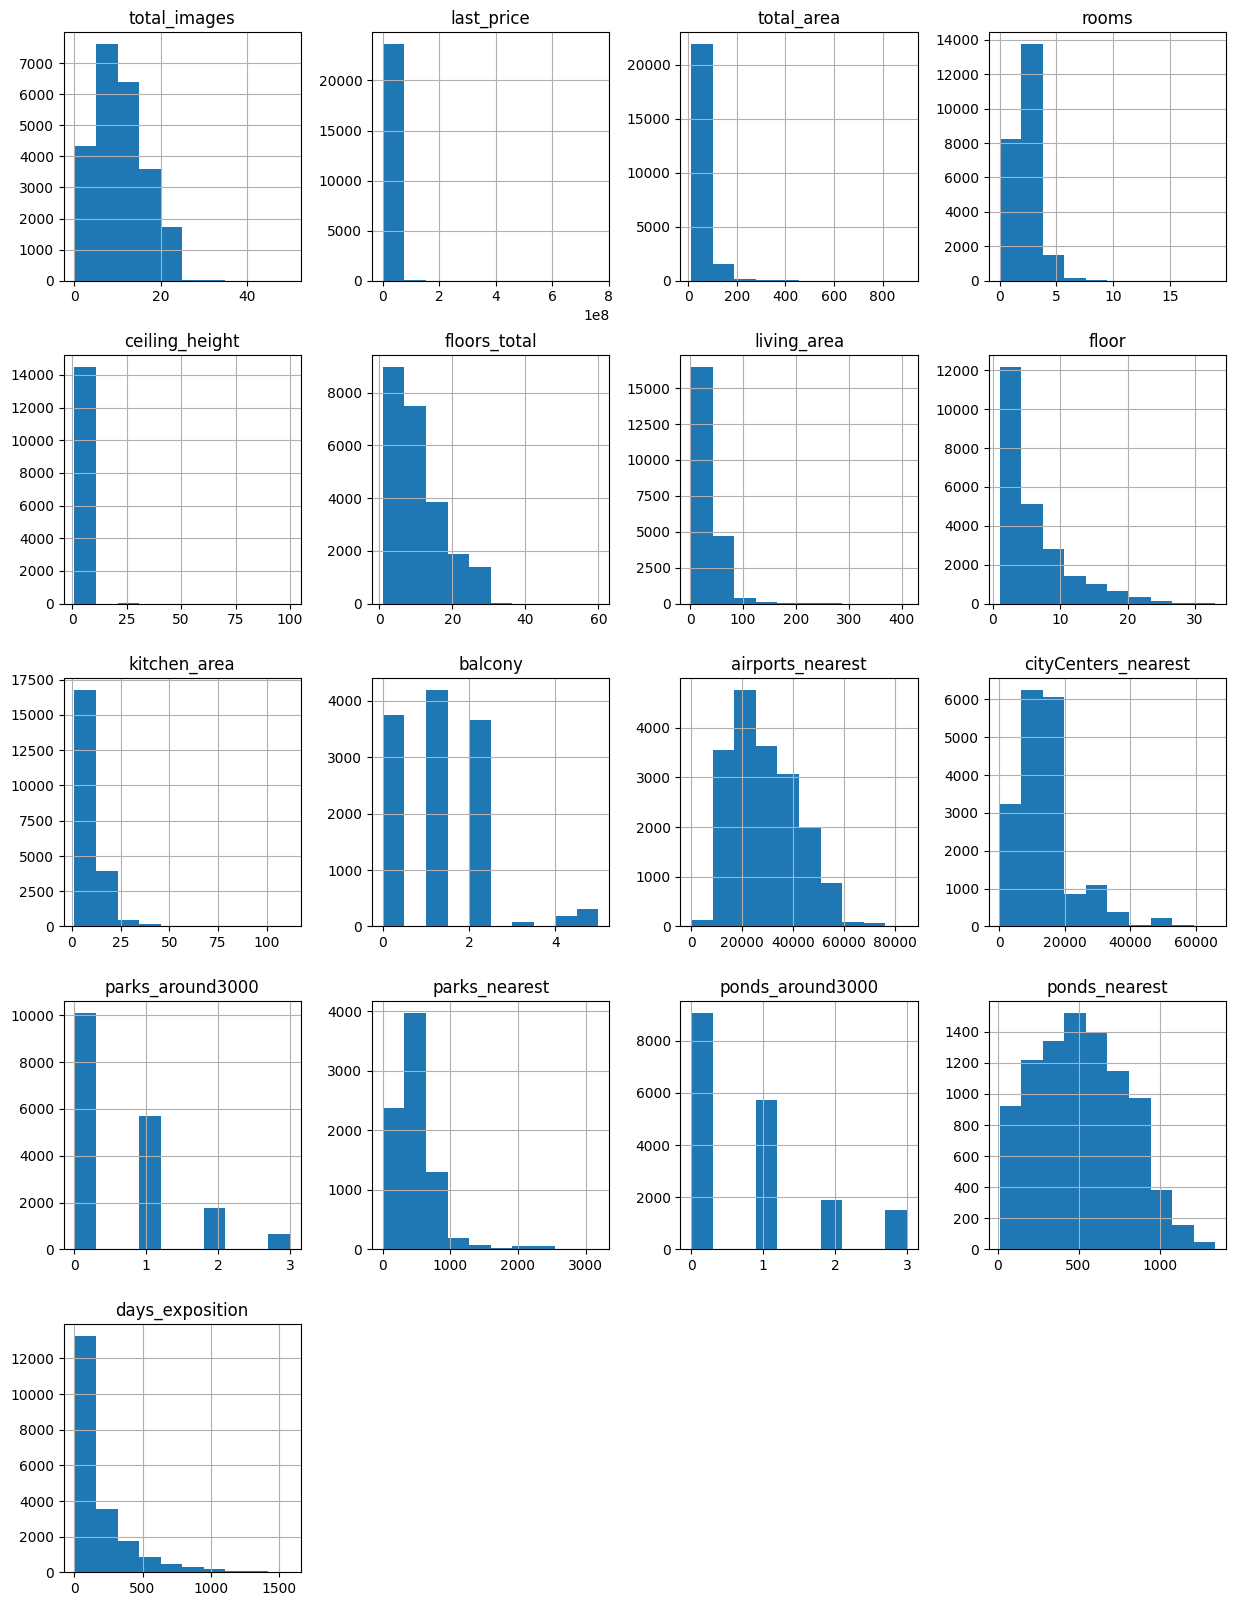

In [4]:
data.hist(figsize=(15, 20));

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
data.duplicated().sum()

0

**Вывод**

В каждой строке таблицы — данные о квартире, выставленной на продажу. Часть колонок содержит картографические данные, например, расстояния до центра города, аэропорта и ближайшего парка. Другая часть — это данные, добавленные пользователем, например, площадь квартиры, её этаж и количество балконов.

Преварительно можно утверждать, что данных достаточно для ответа на поставленные вопросы, но может потребоваться добавление новых столбцов на основе имеющихся.

В некоторых стобцах содержаться пропуски и аномальные неправдоподобные значения. Явных дубликатов на этом этапе не обнаружено, но возможно присутствие неявных дубликатов. Чтобы двигаться дальше, нужно устранить проблемы в данных.

### Предобработка данных

#### Удаление пропусков

Выведем количество пропущенных значений для каждого столбца.

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В столбце `floors_total` **86** пропусков. Мы можем допустить, что в данных строках квартиры находятся на последнем этаже и заполнить пропуски значениями из столбца `floor`. Так мы ликвидируем пропуски, сохранив данные строки.

In [8]:
data.loc[data['floors_total'].isna(), 'floors_total'] = data['floor']
data['floors_total'].isna().sum()

0

В столбце `living_area` присутствует **1903** пропуска. Попробуем заполнить пропуски на основе данных об общей площади квартир и количестве комнат.

In [9]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Разделим все объявления на категории в зависимости от площади.

In [10]:
#функция разбиения на категории по площади
def categorize_total_area(area):
    if area < 35:
        return 'малая площадь'
    elif area > 75:
        return 'крупная площадь'
    else:
        return 'средняя площадь'
    return 'unknown'

#добавим столбец с категорией квартиры в зависимости от площади
data['area_category'] = data['total_area'].apply(categorize_total_area)
len(data[data['area_category'] == 'unknown'])

0

Всем объявлениям присвоены категории. 

Выведем сводную таблицу с медианными значениями `living_area`, а также количеством объявлений в каждой группе. Группировку произведём по количеству комнат и категории, которая была добавлена на предыдущем шаге.

In [11]:
data.pivot_table(index = ['rooms','area_category'], values = 'living_area', aggfunc = ['median','count'])

median       count
                      living_area living_area
rooms area_category                          
0     крупная площадь      60.500           1
      малая площадь        18.000         172
      средняя площадь      29.100          10
1     крупная площадь      38.600          21
      малая площадь        17.000        2818
      средняя площадь      18.000        4549
2     крупная площадь      41.000         528
      малая площадь        20.985          26
      средняя площадь      30.000        6742
3     крупная площадь      52.000        2353
      средняя площадь      42.000        3013
4     крупная площадь      69.000         843
      средняя площадь      46.050         246
5     крупная площадь      92.900         285
      средняя площадь      51.200           7
6     крупная площадь     123.900          99
7     крупная площадь     145.000          53
8     крупная площадь     161.000          12
9     крупная площадь     179.200           7
10    крупная площадь     161.400           3
11    крупная площадь     133.900           2
12    крупная площадь     409.700           1
14    крупная площадь     195.150           2
15    крупная площадь     409.000           1
16    крупная площадь     180.000           1
19    крупная площадь     264.500           1

Заполним пропуски в `living_area` медианными значениями из таблицы выше. 

In [12]:
#совершаем перебор по всем вариантам кол-ва комнат
for room in data['rooms'].unique():
    #совершаем перебор по всем категориям
    for ca in data['area_category'].unique():
        #сохраняем соотвествующие медианные значения вместо пропусков
        data.loc[(data['rooms'] ==  room) & (data['area_category'] == ca) &
                 (data['living_area'].isna()), 'living_area'] = \
        data.loc[(data['rooms'] ==  room) & (data['area_category'] == ca), 'living_area'].median()
        
data['living_area'].isna().sum()

0

В столбце `is_apartment` наблюдаем наибольшее кол-во ропусков - **20924**. Мы не можем просто удалить эти строки, поскольку они составляют очень большую часть выборки. На основании данных из других стольбцов сложно делать выводы о том, является ли объект апартаментом или нет. 

In [13]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Судя по всему, в данном столбце пропуск означает, что объект не является апартаментом. Заменим пропуски на значение "False".

In [14]:
data['is_apartment'] = data['is_apartment'].fillna('False')
data['is_apartment'].isna().sum()

0

Рассмотрим пропуски в столбце `kitchen_area`, их **2278**. Возможно, в данных строках отсустствуют данные, поскольку объект является, например, студией или помещением с открытой планировкой, и по этой причине пользователю было сложно корректно указать размер кухни. Проверим это предположение.

In [15]:
len(data.loc[((data['studio']) | (data['open_plan'])) & (data['kitchen_area'].isna())])

216

Всего в **216** случаях пропуски в `kitchen_area` характерны для объектов, которые являются студией или помещением с открытой планировкой. Заполним эти пропуски нулями, а в остальных случаях воспользуямся медианными значениями по сгруппированным данным, действуя аналогично тому, как мы поступили с  `living_area`.

In [16]:
#заменим пропущенные значения площади кухнина в квартирах-студиях или помещениях свободной планировки на нули
data.loc[((data['studio']) | (data['open_plan'])) & (data['kitchen_area'].isna()), 'kitchen_area'] = 0
len(data.loc[((data['studio']) | (data['open_plan'])) & (data['kitchen_area'].isna())])

0

In [17]:
#заполняем пропуски в 'kitchen_area' медианными значениями в зависимости от кол-ва комнат и общей площади помещения
#совершаем перебор по всем вариантам кол-ва комнат
for room in data['rooms'].unique():
    #совершаем перебор по всем категориям
    for ca in data['area_category'].unique():
        #сохраняем соотвествующие медианные значения вместо пропусков
        data.loc[(data['rooms'] ==  room) & (data['area_category'] == ca) &
                 (data['kitchen_area'].isna()), 'kitchen_area'] = \
        data.loc[(data['rooms'] ==  room) & (data['area_category'] == ca), 'kitchen_area'].median()
        
data['kitchen_area'].isna().sum()

0

Рассмотрим пропуске в столбце `balcony`. 

In [18]:
data['balcony'].isna().sum()

11519

In [19]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0.

In [20]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

0

Как правило, возможными причинами пропусков в данных являются технические ошибки, человеческий фактор, сокрытие или нехватка информации. Нам необходимо обрабатывать пропущенные значения, поскольку они могут привести к ошибкам в анализе и, как следствие, выводах. 

Ликвидация пропусков в некоторых столбцах вынесена в более поздний этап предобработки данных, уже после устранения выбивающихся редких значений.

#### Изменение типов данных

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Поскольку в столбце `first_day_exposition` хранится дата, переведем день публикации объявления в формат datetime.

In [22]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

Изменим тип данных в столбце `is_apartment`, поскольку он хранит лишь булевы значения.

In [23]:
data['is_apartment'] = data['is_apartment'].astype('bool')
data['is_apartment'].head()

0    True
1    True
2    True
3    True
4    True
Name: is_apartment, dtype: bool

Переведём значения в столбцах `floors_total` и `balcony` в целочсиленный тип, поскольку количество этажей или количество балконов не могут быть дробными.

In [24]:
data['floors_total'] = data['floors_total'].astype('int')
data['floors_total'].head()

0    16
1    11
2     5
3    14
4    14
Name: floors_total, dtype: int32

In [25]:
data['balcony'] = data['balcony'].astype('int')
data['balcony'].head()

0    0
1    2
2    0
3    0
4    0
Name: balcony, dtype: int32

В данном случае мы преобразовали типы данных в нескольких столбцах, поскольку это может упростить дальнейший анализ. Например, работая с датами в формате datetime, мы можем использовать функции этого типа или находить разницу между датами с помощью простой операции вычитания.

#### Устранение дубликатов

In [26]:
data.duplicated().sum()

0

Явных дубликатов нет. Проверим столбец `locality_name` на наличие неявных дубликатов, поскольку это единственный столбец со строковым типом данных.

In [27]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [28]:
len(data['locality_name'].unique())

365

В столбце обнаружено множество дублирующих названий. Например, "поселок Тельмана" и "посёлок Тельмана" — это обозначения одних и тех же населенных пунктов, но в таблице они отражены как разные. Это необходимо исправить.

Кроме того, в таблице можно встретить разделение населенных пунктов на группы: "городской посёлок" и "посёлок городского типа", что по сути одно и то же. Поэтому объединим все подобные значения в общую категорию "поселок городского типа".

In [29]:
# словарь, в котором key - корректное значение, value - список изменяемых значений
location_types_to_replace = {
    'поселок' : ['посёлок'],
    'поселок городского типа' : ['посёлок городского типа', 'городской поселок', 'городской посёлок']
}

# итерируемся по элементам словаря
for correct_value, wrong_values in location_types_to_replace.items():
        # перебираем старые значения
        for wrong_value in wrong_values:
            data['locality_name'] = data['locality_name'].replace(wrong_value, correct_value, regex=True)

In [30]:
len(data['locality_name'].unique())

324

Мы сократили количество уникальных значений до **324**, а значит удалили **41** дубликат. 

#### Обработка аномальных значений

До данного этапа предобработка не требовала удаления каких-либо строк из датафрейма, далее это может потребоваться. Поскольку мы имеем право отбросить лишь 10% от изначального датафрейма, то сохраним его текущий размер, а затем сравним его с полученными размерами после обработки. Так мы будем уверены, что не удалили ничего лишнего.

In [31]:
old_data_shape = data.shape
old_data_shape

(23699, 23)

Ранее было замечено, что есть категория квартир, для которых указано количество комнат равное 0.

In [32]:
len(data[data['rooms'] == 0])

197

In [33]:
len(data[(data['rooms'] == 0) & (data['living_area'] != 0)])

197

Количество комнат нулевое, а жилая зона в каждом из случаев не нулевая. Такого быть не может, поскольку жилая площадь - это суммарная велечина жилых комнат, а значит, как минимум, одна комната должна быть. Попробуем устранить данную аномалию.

Логично предположить, что все эти значения относятся к квартирам-студиям или помещениям со свободной планировкой, поскольку в таких объектах спальная, коридорная и кухонная зоны объединены.

In [34]:
data[(data['rooms'] == 0) & ((data['open_plan'] == False) | (data['studio'] == False))]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_category
144,1,2450000.0,27.00,2017-03-30,0,NaN,24,15.50,2,True,True,False,0.0,2,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0,малая площадь
349,4,2320000.0,25.00,2017-09-27,0,NaN,14,17.00,1,True,False,True,0.0,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0,малая площадь
440,8,2480000.0,27.11,2018-03-12,0,NaN,17,24.75,4,True,True,False,0.0,2,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0,малая площадь
508,0,3375000.0,34.40,2017-03-28,0,NaN,26,24.30,19,True,False,True,0.0,1,поселок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0,малая площадь
608,2,1850000.0,25.00,2019-02-20,0,NaN,10,18.00,7,True,True,False,0.0,0,поселок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0,малая площадь
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01,0,NaN,25,18.00,16,True,True,False,0.0,0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0,малая площадь
23442,0,2500000.0,27.70,2017-09-28,0,NaN,24,18.00,4,True,False,True,0.0,2,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0,малая площадь
23554,15,3350000.0,26.00,2018-09-07,0,NaN,19,18.00,8,True,True,False,0.0,0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0,малая площадь
23592,10,1450000.0,29.00,2017-11-11,0,NaN,9,18.00,8,True,False,True,0.0,2,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0,малая площадь


Наши предположения подтвердились. На мой взгляд, в такой ситуации верным решением будет принять все эти квартиры за однокомнатные. 

In [35]:
data.loc[(data['rooms'] == 0), 'rooms'] = 1
len(data[data['rooms'] == 0])

0

Обратимся к числовому описанию данных. Это может помочь в выявлении аномалий.

In [36]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.078948,2.771499,10.671463,34.380364,5.892358,10.375220,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.066196,1.261056,6.595802,21.742333,4.885249,5.763624,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.400000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.000000,8.000000,11.900000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Столбец `last_price` содержит объект стоимостью **12190** рублей. Проверим выборку на наличие подобных значений.

In [37]:
data[data['last_price'] < 100000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_category
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,True,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,крупная площадь


По всей видимости, аномально низкую цену содержит всего одна строка. Вряд ли это реальнное предложение, исключим его из выборки.

In [38]:
data = data[data['last_price'] != 12190]
len(data)

23698

Столбец `airports_nearest` содержит объект, который находится на расстоянии **0** метров до аэропорта. Проверим выборку на наличие подобных значений.

In [39]:
data[data['airports_nearest'] < 1000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_category
21085,0,7000000.0,34.7,2018-09-23,1,2.7,9,19.8,3,True,False,False,6.0,2,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0,малая площадь


По всей видимости, аномально расстояние до аэропорта содержит всего одна строка. Скорее всего пользователь при заполнении данного параметра просто не знал истинного значения. Заполним эту строку медианой.

In [40]:
data.loc[(data['airports_nearest'] == 0), 'airports_nearest'] = data['airports_nearest'].median()
len(data[data['airports_nearest'] < 1000])

0

Проанализируем столбец `ceiling_height`.

In [41]:
data['ceiling_height'].describe()

count    14503.000000
mean         2.771500
std          1.261099
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [42]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

В некоторых строках выоста потолков достигает **25** метров и **32** метра. 

In [43]:
data[(data['ceiling_height'] > 20) & (data['ceiling_height'] < 50)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_category
355,17,3600000.0,55.2,2018-07-12,2,25.0,5,32.0,2,False,False,False,8.4,2,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0,средняя площадь
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3,53.0,2,True,False,False,8.0,0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN,средняя площадь
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9,30.0,2,True,False,False,7.0,1,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0,средняя площадь
4876,7,3000000.0,25.0,2017-09-27,1,27.0,25,17.0,17,True,False,True,0.0,2,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0,малая площадь
5076,0,3850000.0,30.5,2018-10-03,1,24.0,5,19.5,1,True,False,False,5.5,0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0,малая площадь
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5,30.0,3,True,False,False,9.0,2,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0,средняя площадь
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9,21.3,3,True,False,False,7.0,2,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0,средняя площадь
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36,41.0,13,True,False,False,12.0,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0,крупная площадь
6246,6,3300000.0,44.4,2019-03-25,2,25.0,5,31.3,5,True,False,False,5.7,0,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN,средняя площадь
9379,5,3950000.0,42.0,2017-03-26,3,25.0,5,30.0,2,True,False,False,5.2,0,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN,средняя площадь


Преположим, что это на самом деле вещественные значения 2.5 метра и 3.2 метра. Обработаем эти выбросы. 

In [44]:
# функция корректировки высоты потолков
def correcting_height(height):
    if height > 20 and height < 50:
        return (height / 10)
    return height
    
data['ceiling_height'] = data['ceiling_height'].apply(correcting_height)
len(data[(data['ceiling_height'] > 20) & (data['ceiling_height'] < 50)])

0

Кроме того, в данном столбце можно обнаружить значения высоты в **1** метр и **100** метров. Узнаем количество значений, которые можно назвать неправдоподобно большими или неправдободобно малыми.

In [45]:
len(data[(data['ceiling_height'] < 2) | (data['ceiling_height'] > 5)])

18

Количество подобных аномалий в масштабах выборки невилеко, всего **18**. Исключим их из выборки.

In [46]:
data = data[~((data['ceiling_height'] < 2) | (data['ceiling_height'] > 5))] 
len(data)

23680

Посмотрим данные о жилой площади.

Минимальное занчение в столбце `living_area` составляет **2** квадратных метра. Очевидно, что это ошибочный случай. В каждой квартире минимум одна комната, а согласно действующим СНиПам, минимальная площадь комнаты должна быть не менее 8 квадратных метров. Проверим количество аномальных строк.

In [47]:
data[data['living_area'] < 8]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_category
3242,7,4440000.0,41.0,2017-07-02,1,NaN,17,3.0,17,True,False,False,11.0,0,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0,средняя площадь
13915,20,6350000.0,52.0,2018-02-06,2,3.0,6,2.0,2,True,False,False,9.0,0,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0,средняя площадь
16431,13,3799000.0,31.0,2018-04-12,1,2.6,5,6.0,1,True,False,False,17.0,0,Санкт-Петербург,32177.0,4826.0,1.0,430.0,0.0,NaN,168.0,малая площадь
17582,11,2680000.0,22.0,2018-08-11,1,NaN,25,5.0,8,True,True,False,0.0,2,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0,малая площадь
19251,19,4050000.0,33.0,2018-10-15,1,2.5,22,6.5,21,True,False,False,18.0,0,Санкт-Петербург,9258.0,10592.0,1.0,458.0,0.0,NaN,44.0,малая площадь
21758,0,2330000.0,23.0,2018-01-01,1,NaN,24,2.0,22,True,True,False,0.0,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0,малая площадь
21943,15,6100000.0,77.6,2019-02-28,4,2.5,9,5.4,1,True,False,False,9.8,0,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,NaN,33.0,крупная площадь
23574,14,64990000.0,139.0,2015-11-24,3,3.0,8,3.0,8,True,False,False,16.0,1,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0,крупная площадь


Поскольку количество подобных аномалий довольно мало, и логичную замену предложить сложно, удалим эти данные из выборки.

In [48]:
data = data[data['living_area'] >= 8]
len(data)

23672

Рассмотрим столбец `total_area`.

In [49]:
data['total_area'].describe()

count    23672.000000
mean        60.310961
std         35.515975
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

Можно заметить, что в выборке присуствует объект, общая площадь которого достигает **900** кв.м. Это очень большое значение, если учитывать, что 75% выборки имеет площадь не более **69.8** кв.м. Проверим, сколько еще в датафрейме слишком высоких относильно общей выборки значений.

In [50]:
data[data['total_area'] > 200]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_category
155,8,96000000.0,317.0,2017-07-07,4,3.50,3,183.0,3,True,False,False,13.0,1,Санкт-Петербург,22673.0,1771.0,2.0,508.0,3.0,366.0,62.0,крупная площадь
492,18,95000000.0,216.0,2017-12-05,4,3.00,5,86.0,4,True,False,False,77.0,0,Санкт-Петербург,21740.0,436.0,2.0,138.0,3.0,620.0,14.0,крупная площадь
509,5,90000000.0,225.0,2016-06-26,6,NaN,4,134.0,2,True,False,False,19.5,2,Санкт-Петербург,32864.0,5720.0,0.0,NaN,2.0,519.0,416.0,крупная площадь
521,20,25717300.0,230.1,2015-01-21,3,NaN,3,130.0,1,True,False,False,26.1,1,Пушкин,16877.0,29030.0,2.0,676.0,3.0,278.0,1441.0,крупная площадь
581,20,65000000.0,365.0,2019-03-18,7,2.90,7,145.0,7,True,False,False,20.0,0,Санкт-Петербург,19827.0,1690.0,3.0,378.0,3.0,58.0,NaN,крупная площадь
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23005,20,30750000.0,297.5,2018-09-09,6,3.14,4,181.8,2,True,False,False,21.9,0,Санкт-Петербург,20630.0,1229.0,3.0,189.0,3.0,40.0,42.0,крупная площадь
23281,20,24800000.0,231.2,2015-01-21,6,3.10,5,99.8,4,True,False,False,27.4,0,Санкт-Петербург,21480.0,2453.0,3.0,75.0,1.0,795.0,NaN,крупная площадь
23327,19,34400000.0,215.0,2019-03-15,5,2.75,4,82.4,4,True,False,False,40.1,0,Санкт-Петербург,37268.0,15419.0,0.0,NaN,0.0,NaN,NaN,крупная площадь
23400,17,30000000.0,213.0,2017-09-28,7,3.40,5,151.4,5,True,False,False,30.8,0,Санкт-Петербург,21146.0,1225.0,2.0,342.0,3.0,30.0,299.0,крупная площадь


Мы можем исключить все объекты, где общая площадь превышает **200** кв.м, поскльку таких значений сравнительно немного, всего **224**.

In [51]:
data = data[data['total_area'] <= 200]
len(data)

23448

Рассмотрим столбец `rooms`.

In [52]:
data['rooms'].describe()

count    23448.000000
mean         2.043245
std          0.982730
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

Можно заметить, что в выборке присуствует объект, в котором **11** комнат. Это очень большое значение, если учитывать, что 75% объектов в выборке имеет не более **3** комнат. Проверим, сколько еще в датафрейме слишком высоких относильно общей выборки значений.

In [53]:
data[data['rooms'] > 5]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_category
52,20,11795000.0,136.0,2017-09-22,6,3.00,2,94.00,2,True,False,False,11.0,1,Санкт-Петербург,16510.0,6582.0,1.0,526.0,0.0,NaN,NaN,крупная площадь
201,5,10880000.0,123.1,2015-11-12,6,3.20,5,89.00,2,True,False,False,11.0,0,Санкт-Петербург,26009.0,3369.0,2.0,516.0,0.0,NaN,992.0,крупная площадь
648,3,17500000.0,183.7,2018-07-01,11,3.40,7,138.80,7,True,False,False,13.3,0,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN,крупная площадь
750,9,29500000.0,188.8,2017-03-04,7,2.70,2,119.30,1,True,False,False,10.2,0,Санкт-Петербург,20965.0,814.0,0.0,NaN,2.0,267.0,246.0,крупная площадь
807,14,18777000.0,181.5,2018-07-25,6,3.60,6,125.10,4,True,False,False,16.9,0,Санкт-Петербург,24376.0,4639.0,0.0,NaN,1.0,397.0,204.0,крупная площадь
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23047,11,10500000.0,110.0,2018-06-30,6,3.20,7,75.00,6,True,False,False,11.0,0,Санкт-Петербург,22632.0,4418.0,0.0,NaN,0.0,NaN,NaN,крупная площадь
23094,13,12500000.0,155.8,2019-03-21,6,3.20,5,108.80,4,True,False,False,15.3,0,Санкт-Петербург,20414.0,4769.0,1.0,444.0,2.0,429.0,NaN,крупная площадь
23395,4,40000000.0,188.0,2017-05-29,6,NaN,6,109.51,4,True,False,False,31.3,0,Санкт-Петербург,23390.0,2254.0,2.0,425.0,1.0,62.0,30.0,крупная площадь
23448,3,14700000.0,180.0,2018-02-08,6,3.00,6,126.00,5,True,False,False,20.0,0,Санкт-Петербург,23955.0,5089.0,0.0,NaN,2.0,616.0,NaN,крупная площадь


Мы можем исключить все объекты, где количество комнат более **5**, поскльку таких значений сравнительно немного, всего **86**.

In [54]:
data = data[data['rooms'] <= 5]
len(data)

23362

Рассмотрим столбец `last_price`.

In [55]:
data['last_price'].describe()

count    2.336200e+04
mean     5.977022e+06
std      6.128235e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.650000e+06
max      3.300000e+08
Name: last_price, dtype: float64

Добавим столбец `last_price_mln`, где будем хранить цену в миллионах и далее будем работать с данным столбцом, поскольку так будет удобнее проводить анализ.

In [56]:
data['last_price_mln'] = round(data['last_price'] / 1_000_000, 2)
data['last_price_mln'].describe()

count    23362.000000
mean         5.977070
std          6.128235
min          0.430000
25%          3.400000
50%          4.600000
75%          6.650000
max        330.000000
Name: last_price_mln, dtype: float64

Можно заметить, что в выборке присуствует объект, который стоит **330** млн. рублей. Это очень большое значение, если учитывать, что 75% объектов в выборке стоимостью не более **6.7** млн. рублей. Проверим, сколько еще в датафрейме слишком высоких относильно общей выборки значений.

In [57]:
data[data['last_price'] > 20_000_000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_category,last_price_mln
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,52.00,9,True,False,False,13.50,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,крупная площадь,64.90
42,13,22000000.0,161.8,2015-07-08,4,2.80,4,80.90,2,False,False,False,17.60,5,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0,крупная площадь,22.00
51,7,45000000.0,161.0,2017-10-17,3,3.20,8,38.00,4,True,False,False,50.00,0,Санкт-Петербург,32537.0,6589.0,0.0,NaN,3.0,99.0,541.0,крупная площадь,45.00
121,20,33000000.0,180.0,2017-02-17,3,2.90,9,86.00,8,False,False,False,24.00,4,Санкт-Петербург,25689.0,4264.0,1.0,633.0,0.0,NaN,144.0,крупная площадь,33.00
147,10,27700000.0,179.6,2017-07-06,5,2.85,25,97.20,25,True,False,False,33.80,2,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,75.0,крупная площадь,27.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23369,19,20900000.0,129.0,2016-05-13,3,3.02,8,81.00,7,True,False,False,19.00,1,Санкт-Петербург,22913.0,2454.0,0.0,NaN,0.0,NaN,188.0,крупная площадь,20.90
23446,19,27000000.0,110.0,2016-03-11,3,NaN,7,63.00,5,True,False,False,15.00,1,Санкт-Петербург,26819.0,5026.0,1.0,657.0,1.0,678.0,200.0,крупная площадь,27.00
23516,3,22529250.0,139.5,2018-07-04,4,3.30,16,82.55,9,True,False,False,13.84,0,Санкт-Петербург,37434.0,8460.0,1.0,441.0,2.0,427.0,266.0,крупная площадь,22.53
23590,0,21187872.0,123.3,2017-04-25,3,NaN,18,50.40,18,True,False,False,23.60,0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0,крупная площадь,21.19


Мы можем исключить все объекты, где цена превышает **20** млн. рублей, поскльку таких значений сравнительно немного, всего **500**.

In [58]:
data = data[data['last_price'] <= 20_000_000]
len(data)

22862

Рассмотрим столбец `living_area`.

In [59]:
data['living_area'].describe()

count    22862.000000
mean        32.100493
std         15.409457
min          8.000000
25%         18.100000
50%         30.000000
75%         41.300000
max        145.400000
Name: living_area, dtype: float64

Можно заметить, что в выборке присуствует объект, жилая площадь которого достигает **145.4** кв.м. Это очень большое значение, если учитывать, что 75% выборки имеет площадь не более **41.3** кв.м. Проверим, сколько еще в датафрейме слишком высоких относильно общей выборки значений.

In [60]:
data[data['living_area'] > 80]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_category,last_price_mln
35,6,15500000.0,149.0,2017-06-26,5,NaN,5,104.0,4,True,False,False,17.0,0,Санкт-Петербург,23670.0,3502.0,0.0,NaN,1.0,779.0,644.0,крупная площадь,15.50
178,18,16300000.0,153.0,2019-03-30,4,2.71,10,89.4,10,True,False,False,13.0,1,Санкт-Петербург,52130.0,14042.0,0.0,NaN,2.0,346.0,NaN,крупная площадь,16.30
417,5,14200000.0,178.0,2017-10-26,5,3.30,4,126.6,2,True,False,False,19.4,0,Санкт-Петербург,24287.0,2835.0,0.0,NaN,3.0,257.0,104.0,крупная площадь,14.20
424,14,11500000.0,98.0,2016-05-10,3,2.65,3,88.0,3,False,False,False,13.5,1,Санкт-Петербург,39363.0,13270.0,0.0,NaN,0.0,NaN,90.0,крупная площадь,11.50
496,11,13460000.0,136.2,2019-02-27,4,3.00,6,99.5,5,True,False,False,10.2,0,Санкт-Петербург,25997.0,4699.0,1.0,816.0,1.0,1251.0,NaN,крупная площадь,13.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23216,15,10150000.0,114.0,2015-01-21,4,NaN,5,90.2,4,True,False,False,16.0,0,Санкт-Петербург,26259.0,4961.0,0.0,NaN,2.0,838.0,1052.0,крупная площадь,10.15
23382,2,15000000.0,150.9,2016-07-04,4,3.67,4,98.2,3,True,False,False,23.9,0,Санкт-Петербург,21204.0,2180.0,3.0,105.0,1.0,614.0,455.0,крупная площадь,15.00
23418,4,13500000.0,125.0,2016-10-20,4,3.30,7,80.2,3,True,False,False,11.0,0,Санкт-Петербург,14509.0,8288.0,0.0,NaN,0.0,NaN,707.0,крупная площадь,13.50
23514,4,12000000.0,136.5,2018-02-01,5,3.45,5,96.0,3,True,False,False,10.0,1,Санкт-Петербург,23833.0,4401.0,2.0,447.0,0.0,NaN,81.0,крупная площадь,12.00


Мы можем исключить все объекты, где жилая площадь превышает **80** кв.м, поскльку таких значений сравнительно немного, всего **275**.

In [61]:
data = data[data['living_area'] <= 80]
len(data)

22587

Рассмотрим столбец Рассмотрим столбец `kitchen_area`.

In [62]:
data['kitchen_area'].describe()

count    22587.000000
mean         9.833218
std          4.506693
min          0.000000
25%          7.000000
50%          9.000000
75%         11.100000
max         64.000000
Name: kitchen_area, dtype: float64

Можно заметить, что в выборке присуствует объект, площадь кухни которого достигает **64** кв.м. Это очень большое значение, если учитывать, что 75% выборки имеет площадь не более **11.1** кв.м. Проверим, сколько еще в датафрейме слишком высоких относильно общей выборки значений.

In [63]:
data[data['kitchen_area'] > 25]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_category,last_price_mln
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,крупная площадь,10.00
137,11,13310800.0,85.1,2018-01-01,2,2.70,10,31.52,5,True,False,False,26.85,1,Санкт-Петербург,31460.0,4263.0,1.0,141.0,3.0,133.0,340.0,крупная площадь,13.31
279,19,18450000.0,134.0,2019-03-18,4,NaN,18,78.00,17,True,False,False,30.00,0,Санкт-Петербург,34991.0,11920.0,0.0,NaN,0.0,NaN,NaN,крупная площадь,18.45
511,7,5950000.0,69.0,2017-12-21,1,NaN,16,13.00,12,True,False,False,50.00,1,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,56.0,средняя площадь,5.95
576,12,8600000.0,100.0,2017-09-11,3,NaN,5,42.50,2,True,False,False,31.00,1,Санкт-Петербург,13836.0,8839.0,0.0,NaN,0.0,NaN,50.0,крупная площадь,8.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22560,15,5500000.0,98.0,2018-12-09,3,2.60,8,52.00,2,True,False,False,28.00,0,Красное Село,27164.0,30589.0,0.0,NaN,0.0,NaN,7.0,крупная площадь,5.50
22718,3,5571360.0,77.4,2018-12-09,2,NaN,6,41.00,5,True,False,False,29.40,0,поселок городского типа Новоселье,NaN,NaN,NaN,NaN,NaN,NaN,60.0,крупная площадь,5.57
22818,8,4980000.0,92.0,2015-07-10,2,2.90,15,46.00,2,False,False,False,26.00,2,Колпино,26956.0,32742.0,1.0,276.0,2.0,509.0,476.0,крупная площадь,4.98
23134,4,12900000.0,118.0,2016-01-20,3,3.00,6,53.00,6,False,False,False,36.00,0,Санкт-Петербург,23476.0,4258.0,0.0,NaN,0.0,NaN,332.0,крупная площадь,12.90


Мы можем исключить все объекты, где площадь кухни превышает **25** кв.м, поскльку таких значений сравнительно немного, всего **293**.

In [64]:
data = data[data['kitchen_area'] <= 25]
len(data)

22294

Рассмотрим столбец `floor`.

In [65]:
data['floor'].describe()

count    22294.000000
mean         5.914327
std          4.914011
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Можно заметить, что в выборке присуствует объект, который расположен на **33** этаже. Это очень большое значение, если учитывать, что 75% объектов в выборке находится не выше **8** этажа. Проверим, сколько еще в датафрейме слишком высоких относильно общей выборки значений.

In [66]:
len(data[data['floor'] > 25])

40

Мы можем исключить все объекты, которые находятся выше **25** этажа, поскльку таких значений сравнительно немного, всего **40**.

In [67]:
data = data[data['floor'] <= 25]
len(data)

22254

Рассмотрим столбец `floors_total`.

In [68]:
data['floors_total'].describe()

count    22254.000000
mean        10.759684
std          6.598107
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Можно заметить, что в выборке присуствует объект, в котором **60** этажей. Это очень большое значение, если учитывать, что 75% объектов в выборке высотой всего в **16** этажей. Проверим, сколько еще в датафрейме слишком высоких относильно общей выборки значений.

In [69]:
len(data[data['floors_total'] > 30])

21

Мы можем исключить все объекты, в которых более **30** этажей, поскольку таких значений сравнительно немного, всего **21**.

In [70]:
data = data[data['floors_total'] <= 30]
len(data)

22233

In [71]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_mln
count,22233.000000,2.223300e+04,22233.000000,22233.000000,13500.000000,22233.000000,22233.000000,22233.000000,22233.000000,22233.000000,16773.000000,16790.000000,16791.000000,7182.000000,16791.000000,8176.000000,19420.000000,22233.000000
mean,9.734449,5.190132e+06,54.570477,1.964737,2.697361,10.734899,31.222161,5.870283,9.516885,0.594252,28886.322006,14678.589875,0.574355,495.489975,0.726639,527.790362,175.282904,5.190179
std,5.584922,2.895748e+06,20.344233,0.894396,0.240092,6.548871,13.734864,4.830008,3.548523,0.951995,12867.352782,8526.766652,0.772553,341.439413,0.904271,276.232801,213.481190,2.895742
min,0.000000,4.300000e+05,12.000000,1.000000,2.000000,1.000000,8.000000,1.000000,0.000000,0.000000,6450.000000,208.000000,0.000000,1.000000,0.000000,13.000000,1.000000,0.430000
25%,6.000000,3.350000e+06,39.300000,1.000000,2.500000,5.000000,18.000000,2.000000,7.000000,0.000000,18214.000000,10203.000000,0.000000,292.000000,0.000000,311.000000,44.000000,3.350000
50%,9.000000,4.500000e+06,50.000000,2.000000,2.600000,9.000000,30.000000,4.000000,9.000000,0.000000,27006.000000,13370.000000,0.000000,458.000000,0.000000,513.500000,92.000000,4.500000
75%,14.000000,6.250000e+06,65.200000,3.000000,2.760000,16.000000,40.700000,8.000000,11.000000,1.000000,37498.000000,16526.000000,1.000000,617.000000,1.000000,736.000000,223.000000,6.250000
max,39.000000,2.000000e+07,199.200000,5.000000,5.000000,29.000000,80.000000,25.000000,25.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,20.000000


В остальных стобцах аномальных значений обнаружено не было, а большие или малые значения не слишком выделяются на общем фоне.

#### Удаление пропусков (продолжение)

In [72]:
data['ceiling_height'].isna().sum()

8733

В столбце `ceiling_height` наблюдаются **8733** пропуска, что является практически половиной всех строк в датафрейме. Заполнять данные будем медианным значением. Поскольку высота потолков в доме может зависить от количества этажей в этом доме, то предварительно сгруппируем данные по количеству этажей в доме, и вычислять медиану будем для каждой группы в отдельности.

In [73]:
data.pivot_table(index = 'floors_total', values = 'ceiling_height', aggfunc = ['median','count'])

,median,count
,ceiling_height,ceiling_height
floors_total,,
1,2.800,10
2,2.700,202
3,2.750,359
4,2.915,694
5,2.550,3469
6,3.000,471
7,2.810,302
8,2.750,168


Заполним остальные пропуски в `ceiling_height` медианными значениями из таблицы выше.

In [74]:
#совершаем перебор по всем вариантам этажности домов
for floors in data['floors_total'].unique():
    #сохраняем соотвествующие медианные значения вместо пропусков
    data.loc[(data['floors_total'] ==  floors) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['floors_total'] ==  floors), 'ceiling_height'].median()
        
data['ceiling_height'].isna().sum()

0

Проверим сколько отсуствующих значений в столбце `locality_name`.

In [75]:
data['locality_name'].isna().sum()

44

В данном случае заполнить пропуски, опираясь на информацию из других столбцов сложно, и в масштабах выборки **44** строк это небольшое значение, а значит ими можно пренебречь. Исключим эти строки из выборки.

In [76]:
data = data.dropna(subset=['locality_name'])
data['locality_name'].isna().sum()

0

In [77]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5454
cityCenters_nearest      5437
parks_around3000         5436
parks_nearest           15020
ponds_around3000         5436
ponds_nearest           14037
days_exposition          2812
area_category               0
last_price_mln              0
dtype: int64

Поскольку в остальных случаях логичную замену пропускам предложить невозможно, то оставим эти значения пустыми.

Проверим, насколько сократился наш датафрейм после предобработки данных.

In [78]:
new_data_shape = data.shape
round(new_data_shape[0] / old_data_shape[0], 3)

0.936

Мы отбросили менее 7% данных, что является приемлемым.

**Вывод**

Предобработка обнаружила три проблемы в данных:
- пропущенные значения,
- неверные типы данных,
- неявные дубликаты,
- аномальные значения.

Мы заполнили пропуски там, где это возможно. Преобразовали тип  данных в столбцах так, чтобы облегчить работу с ними.
Избавились от неявных дубликатов и выбивающихся неправдобоных значений, что сделает исследование более точным.

Теперь можно перейти к добавлению новых параметров.

### Посчитайте и добавьте в таблицу новые столбцы

Добавим столбец с ценой за один квадратный метр.

In [79]:
data['one_m_price'] = round(data['last_price'] / data['total_area'])

Добавим день недели, месяц и год публикации объявления.

In [80]:
data['week_day_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

Разделим все объявления на категории в зависимости от этажа, на котором находится квартира: "первый", "последний", "другой".

In [81]:
#функция разбиения на категории по этажу
def categorize_by_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    return 'unknown'

data['floor_category'] = data.apply(categorize_by_floor, axis=1)
len(data[data['floor_category'] == 'unknown'])

0

Добавим столбец с расстоянием до центра города в километрах.

In [82]:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000)

Выведем измененный датафрейм.

In [83]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_category,last_price_mln,one_m_price,week_day_exposition,month_exposition,year_exposition,floor_category,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,крупная площадь,13.00,120370.0,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.70,11,18.6,1,True,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,средняя площадь,3.35,82921.0,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,средняя площадь,5.20,92786.0,3,8,2015,другой,14.0
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,True,False,False,9.1,0,поселок городского типа Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,малая площадь,2.89,95066.0,0,9,2018,другой,NaN
6,6,3700000.0,37.3,2017-11-02,1,2.65,26,10.6,6,True,False,False,14.4,1,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,средняя площадь,3.70,99196.0,3,11,2017,другой,19.0


**Вывод**

На данном этапе для каждого объекта мы добавили в таблицу следующие параметры:
- цена одного квадратного метра;
- день недели, месяц и год публикации объявления;
- тип этажа квартиры;
- расстояние до центра города в километрах.

Эти столбцы нам помогут ответить на поставленные вопросы и сформировать правильные выводы. Переходим к исследовательскому анализу.

### Проведите исследовательский анализ данных

#### Анализ отдельных парметров

Рассмотрим столбец `total_area`.

In [84]:
data['total_area'].describe()

count    22189.000000
mean        54.552712
std         20.337852
min         12.000000
25%         39.220000
50%         50.000000
75%         65.200000
max        199.200000
Name: total_area, dtype: float64

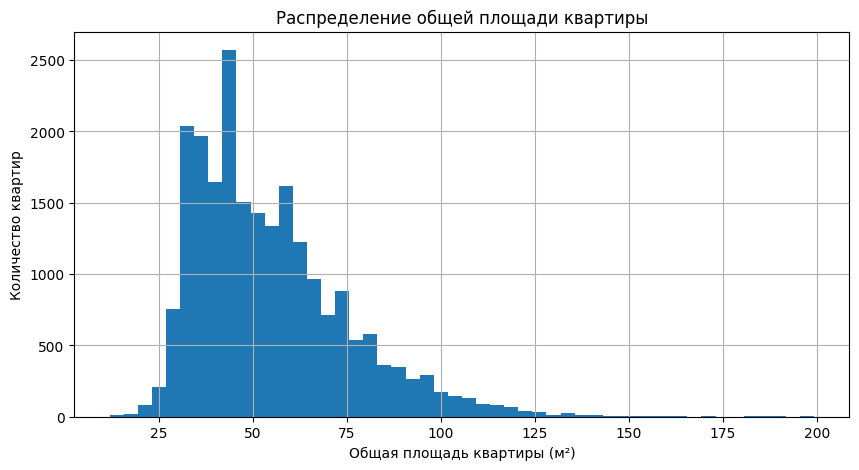

In [85]:
data['total_area'].hist(figsize=(10, 5), bins=50)
plt.title('Распределение общей площади квартиры')
plt.xlabel('Общая площадь квартиры (м²)')
plt.ylabel('Количество квартир')
plt.show()

Гистограмма имеет вид распределния Пуассона, что является характерным для подобного типа данных. Средняя площадь квартир составляет **54.6** кв.м, что довольно близко к медианному значению в **50** кв.м. Это говорит о том, что выбросы присутствуют, но они не оказывают сильного влияния на выборку, квартир с площадью свыше **125** кв.м очень мало. Судя по графику, основная масса квартир лежит в диапозоне от **30** кв.м до **75** кв.м.

Рассмотрим столбец `living_area`.

In [86]:
data['living_area'].describe()

count    22189.000000
mean        31.209387
std         13.729206
min          8.000000
25%         18.000000
50%         30.000000
75%         40.700000
max         80.000000
Name: living_area, dtype: float64

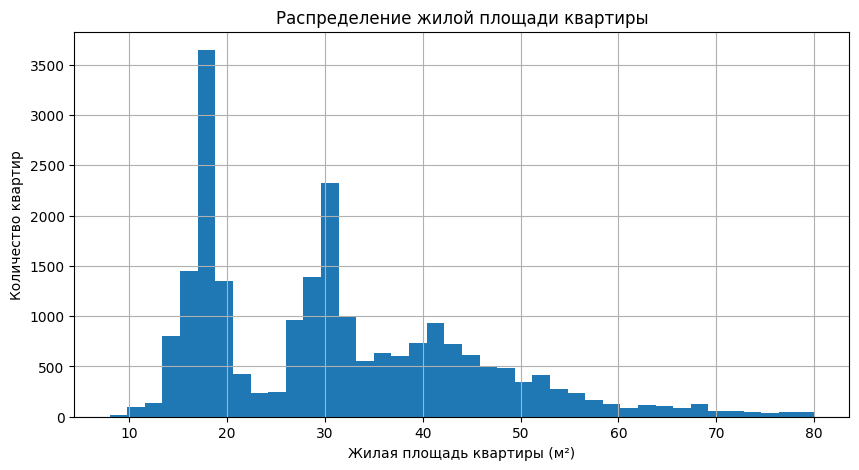

In [87]:
data['living_area'].hist(figsize=(10, 5), bins=40)
plt.title('Распределение жилой площади квартиры')
plt.xlabel('Жилая площадь квартиры (м²)')
plt.ylabel('Количество квартир')
plt.show()

Средняя жилая площадь квартир составляет **31.2** кв.м, что довольно близко к медианному значению в **30** кв.м. Выбросы присутствуют, но их мало. На графике заметен провал в диапозоне значений примерно от **20** кв.м до **30** кв.м. Судя по всему, основная масса квартир лежит в диапозоне от **15** кв.м до **45** кв.м.

Рассмотрим столбец `kitchen_area`.

In [88]:
data['kitchen_area'].describe()

count    22189.000000
mean         9.515337
std          3.548401
min          0.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         25.000000
Name: kitchen_area, dtype: float64

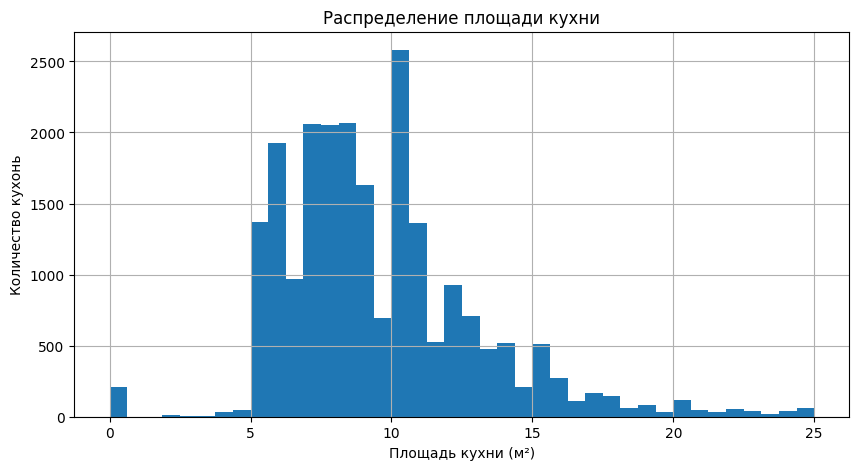

In [89]:
data['kitchen_area'].hist(figsize=(10, 5), bins=40)
plt.title('Распределение площади кухни')
plt.xlabel('Площадь кухни (м²)')
plt.ylabel('Количество кухонь')
plt.show()

На графике можно увидеть небольшое количество квартир с нулевым размером кухни. Это те самые студии и помещения с открытой планировкой, и, как мы видим, такое небольшое количество выбросов не может повлиять на общее распределение. Средний размер кухни в **9.5** кв.м очень близок к медианному значению в **9** кв.м. Основная масса квартир имеет размер кухни в диапозоне от **5** кв.м до **12** кв.м.

Рассмотрим столбец `last_price_mln`.

In [90]:
data['last_price_mln'].describe()

count    22189.000000
mean         5.188688
std          2.894917
min          0.430000
25%          3.350000
50%          4.500000
75%          6.250000
max         20.000000
Name: last_price_mln, dtype: float64

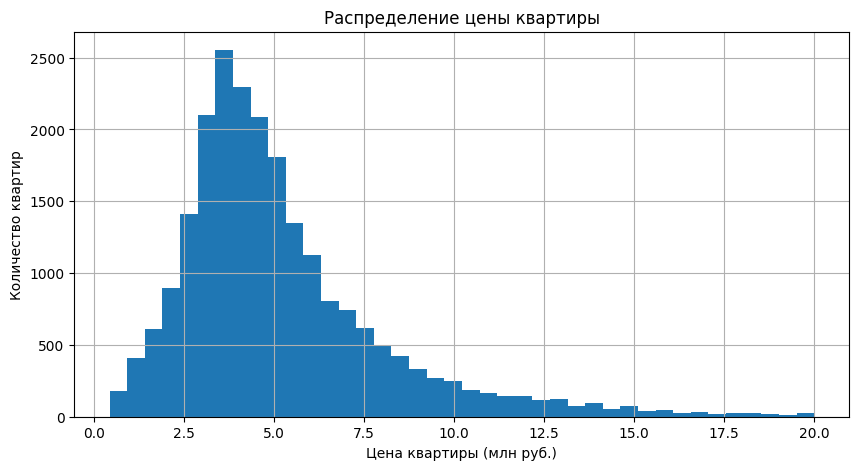

In [91]:
data['last_price_mln'].hist(figsize=(10, 5), bins=40)
plt.title('Распределение цены квартиры')
plt.xlabel('Цена квартиры (млн руб.)')
plt.ylabel('Количество квартир')
plt.show()

Гистограмма также имеет вид распределния Пуассона. Срденее цена за квартиру в **5.2** млн. рублей довольна близка к медианному значению в **4.5** млн. рублей. Основная масса квартир продается по цене от **2.5** млн. рублей кв.м до **6.5** млн. рублей.

Рассмотрим столбец `rooms`.

In [92]:
data['rooms'].describe()

count    22189.000000
mean         1.964036
std          0.894198
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

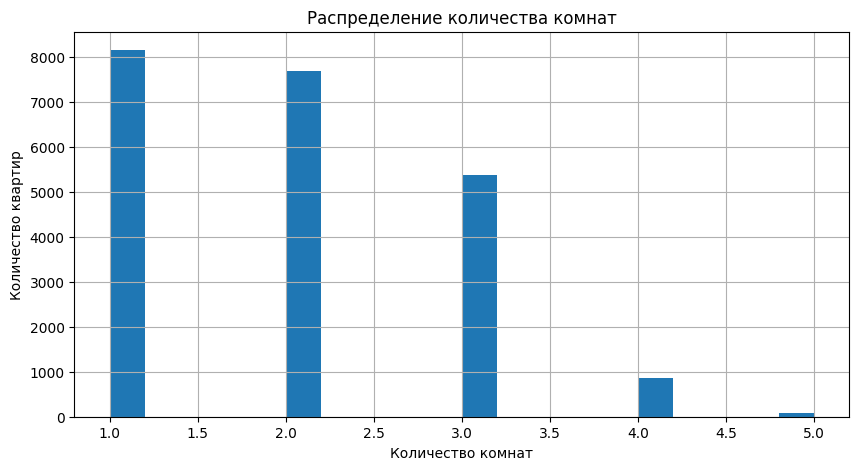

In [93]:
data['rooms'].hist(figsize=(10, 5), bins=20)
plt.title('Распределение количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

Гистограмма отражает довольно ожидаемый вид распределния, численные данные принимают закономерные значения. Медианное значение в **2** комнаты совпадает со средним. В большенстве квартир от **1** до **3** комнат, но есть и небольшая доля квартир, в которых **4** и более комнат.

Рассмотрим столбец `ceiling_height`.

In [94]:
data['ceiling_height'].describe()

count    22189.000000
mean         2.684278
std          0.200905
min          2.000000
25%          2.550000
50%          2.650000
75%          2.750000
max          5.000000
Name: ceiling_height, dtype: float64

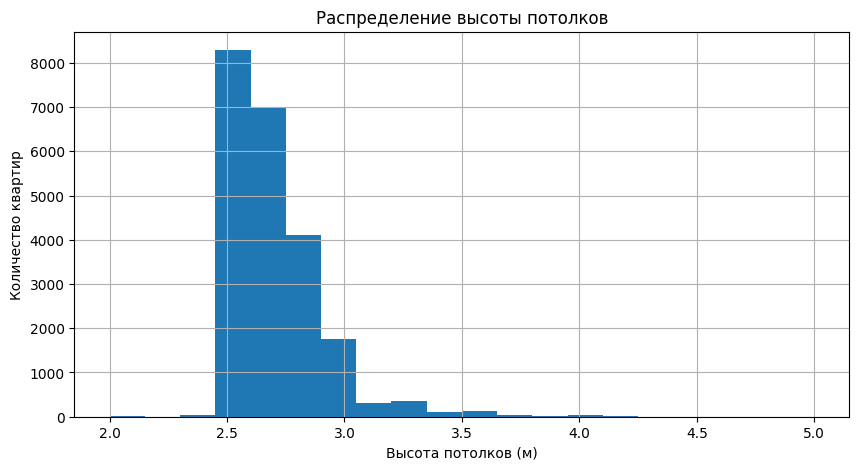

In [95]:
data['ceiling_height'].hist(figsize=(10, 5), bins=20)
plt.title('Распределение высоты потолков')
plt.xlabel('Высота потолков (м)')
plt.ylabel('Количество квартир')
plt.show()

Гистограмма принимает вид распределния Пуассона. Средняя высота потолков составляет **2.68** м, что довольно близко к медиане, она равна **2.65** м. Судя по графику, большенство квартир имеют высотку потолков от **2.5** до **3** метров, но в некоторых квартирах высота потолков может быть выше и **3.5** метров.

Рассмотрим столбец `floor`.

In [96]:
data['floor'].describe()

count    22189.000000
mean         5.870521
std          4.827552
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         25.000000
Name: floor, dtype: float64

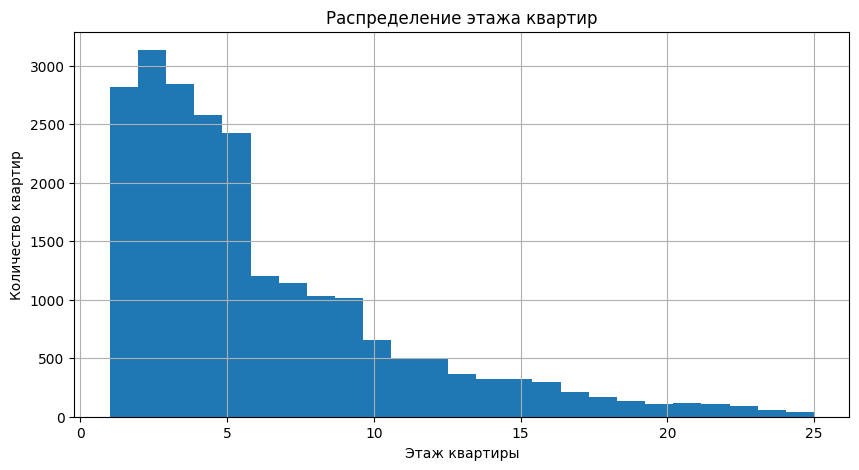

In [97]:
data['floor'].hist(figsize=(10, 5), bins=25)
plt.title('Распределение этажа квартир')
plt.xlabel('Этаж квартиры')
plt.ylabel('Количество квартир')
plt.show()

Средняя квартира располагается на **6** этаже, а медианная на **4** этаже. Такая разница обусловлена наличием квартир, которые расположены выше **20** этажа при том, что большенство квартир лежит в диапозоне от **1** до **10** этажа.

Рассмотрим столбец `floors_total`.

In [98]:
data['floors_total'].describe()

count    22189.000000
mean        10.736581
std          6.545866
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

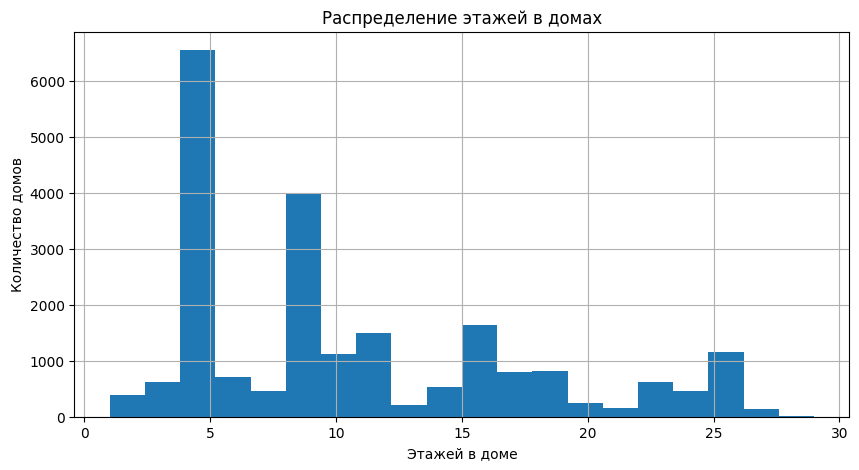

In [137]:
data['floors_total'].hist(figsize=(10, 5), bins=20)
plt.title('Распределение этажей в домах')
plt.xlabel('Этажей в доме')
plt.ylabel('Количество домов')
plt.show()

Средний дом насчитывает в общем **11** этажей, а медианный **9** этажей. Большенство домов имеют высоту от **4** до **18** этажей, но есть и уникальные постройки высотой в **25** или даже более этажей.

Рассмотрим столбец `floor_category`.

In [100]:
data.groupby('floor_category')['floor_category'].count()

floor_category
другой       16251
первый        2816
последний     3122
Name: floor_category, dtype: int64

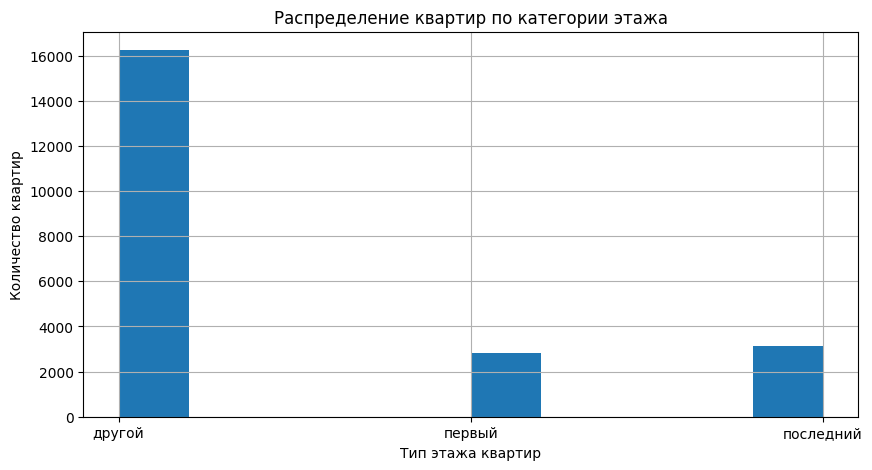

In [101]:
data['floor_category'].hist(figsize=(10, 5))
plt.title('Распределение квартир по категории этажа')
plt.xlabel('Тип этажа квартир')
plt.ylabel('Количество квартир')
plt.show()

В данной выборке не часто можно встретить объявление с продажей квартиры на первом или на последнем этаже. Квартир, расположенных на других этажах, то есть из категории "другой", почти в 3 раза больше, чем суммарное количество квартир из двух оставшихся категорий.

Рассмотрим столбец `cityCenters_nearest`.

In [102]:
data['cityCenters_nearest'].describe()

count    16752.000000
mean     14687.095750
std       8527.115202
min        208.000000
25%      10228.500000
50%      13374.000000
75%      16526.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

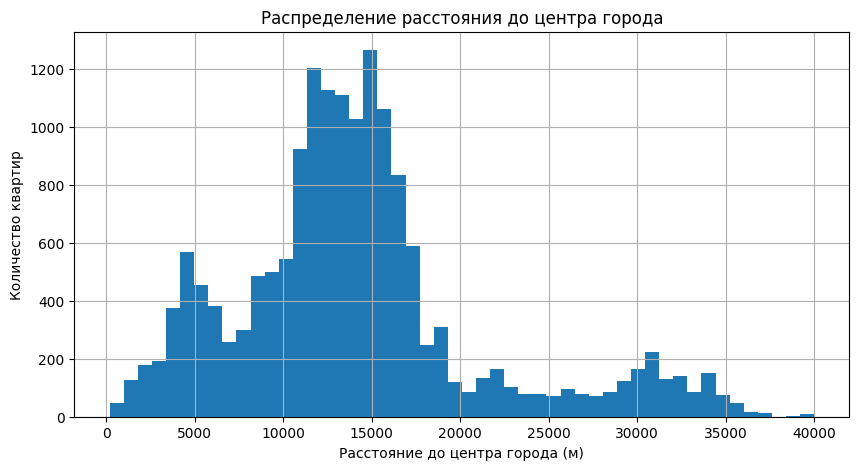

In [103]:
data['cityCenters_nearest'].hist(figsize=(10, 5), bins=50, range=(181, 40000))
plt.title('Распределение расстояния до центра города')
plt.xlabel('Расстояние до центра города (м)')
plt.ylabel('Количество квартир')
plt.show()

Среднее значения расстояние до центра довольно близко к медианному, **14687** м и **13374** м соотвественно. Судя по графику, большенство значений лежит в диапозоне от **4000** м до **17000** м. По всей видимости, большенство объектов находится в пределах города Санкт-Петербург. Присуствуют выбросы в виде расстояния до центра города свыше **35000** м, но их крайне мало.

Рассмотрим столбец `airports_nearest`.

In [104]:
data['airports_nearest'].describe()

count    16735.000000
mean     28898.149866
std      12875.930927
min       6450.000000
25%      18196.500000
50%      27049.000000
75%      37508.500000
max      84869.000000
Name: airports_nearest, dtype: float64

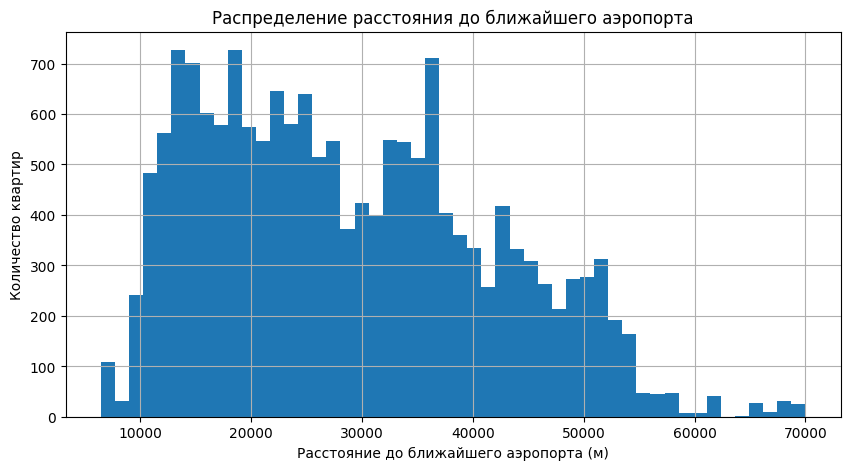

In [105]:
data['airports_nearest'].hist(figsize=(10, 5), bins=50, range=(6450, 70000))
plt.title('Распределение расстояния до ближайшего аэропорта')
plt.xlabel('Расстояние до ближайшего аэропорта (м)')
plt.ylabel('Количество квартир')
plt.show()

Среднее расстояние до аэропорта составляет **28898** м, что достаточно близко к медианному значению в **27049** м. В целом, можно сказать, что аэропорт города Санкт-Петербург находится на довольно удаленном расстояния от большинства жилых зон. Наиболее близкий к аэропорту продаваемый объект находится на рассоянии **6450** м, и подобных объектов крайне мало.

Рассмотрим столбец `parks_nearest`.

In [106]:
data['parks_nearest'].describe()

count    7169.000000
mean      495.505928
std       341.666370
min         1.000000
25%       292.000000
50%       458.000000
75%       617.000000
max      3190.000000
Name: parks_nearest, dtype: float64

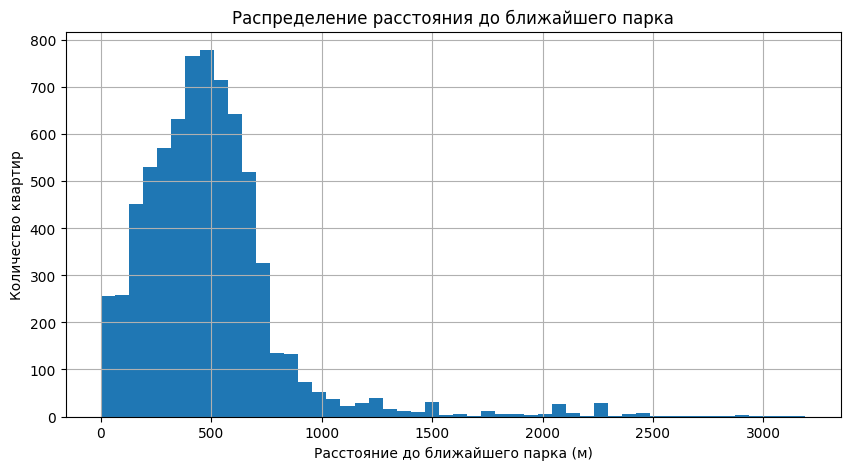

In [107]:
data['parks_nearest'].hist(figsize=(10, 5), bins=50)
plt.title('Распределение расстояния до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка (м)')
plt.ylabel('Количество квартир')
plt.show()

Среднее расстоние от квартиры до парка составляет **496** м, а медиана равна **458** м. В абсолютном большенстве случаев расстояние до парков не превосходит **1000** м, то есть для большенства объектов предусмотрен, как минимум, один парк в пешей доступности.

Рассмотрим столбец `week_day_exposition`.

In [108]:
data['week_day_exposition'].describe()

count    22189.000000
mean         2.570598
std          1.791461
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: week_day_exposition, dtype: float64

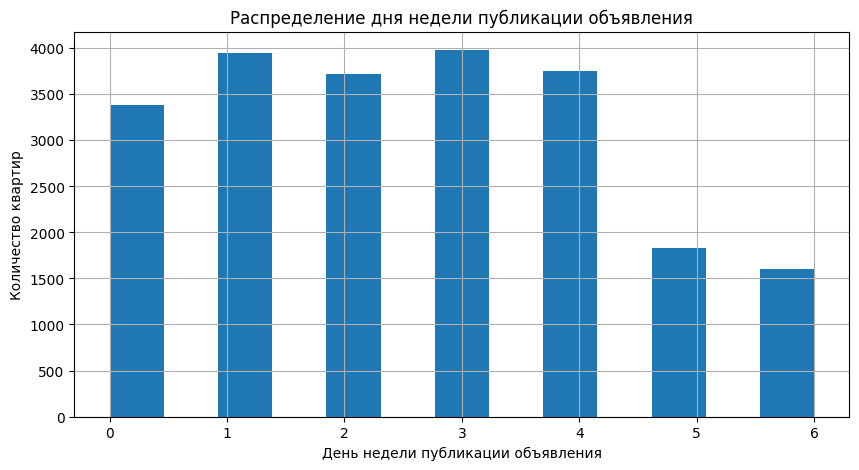

In [109]:
data['week_day_exposition'].hist(figsize=(10, 5), bins=13)
plt.title('Распределение дня недели публикации объявления')
plt.xlabel('День недели публикации объявления')
plt.ylabel('Количество квартир')
plt.show()

Для данного параметра можно сказать, что в выходные дни объявления о продаже публикуются гораздо реже, чем в будни. Больше всего публикаций сделано во вторник и четверг. 

Рассмотрим столбец `month_exposition`.

In [110]:
data['month_exposition'].describe()

count    22189.000000
mean         6.407409
std          3.489477
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

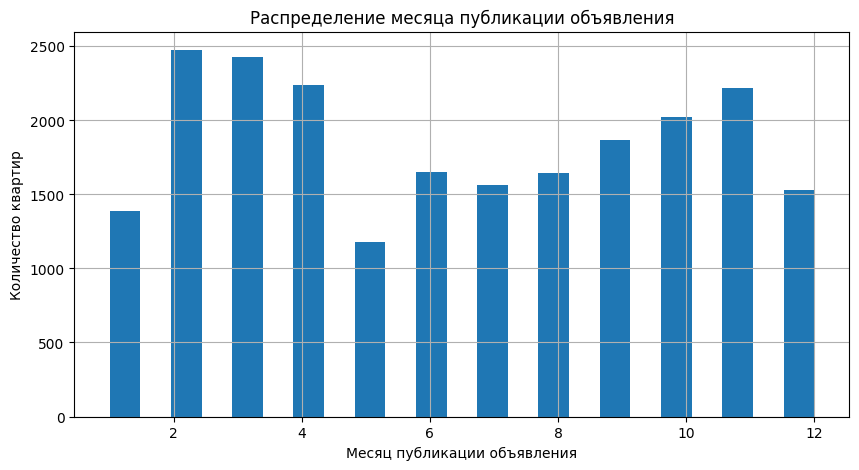

In [111]:
data['month_exposition'].hist(figsize=(10, 5), bins=23)
plt.title('Распределение месяца публикации объявления')
plt.xlabel('Месяц публикации объявления')
plt.ylabel('Количество квартир')
plt.show()

Судя по графику, люди наименее активно публикуют объяления в месяца с наибольшим количеством праздничных дней: декабрь, январь, май, а также в период отпусков: июнь, июль, август. В остальные месяца объявления публикуются гораздо чаще.

#### Скорость продажи объекта

Рассмотрим столбец `days_exposition`.

In [112]:
data['days_exposition'].describe()

count    19377.000000
mean       175.134025
std        213.500697
min          1.000000
25%         44.000000
50%         92.000000
75%        222.000000
max       1580.000000
Name: days_exposition, dtype: float64

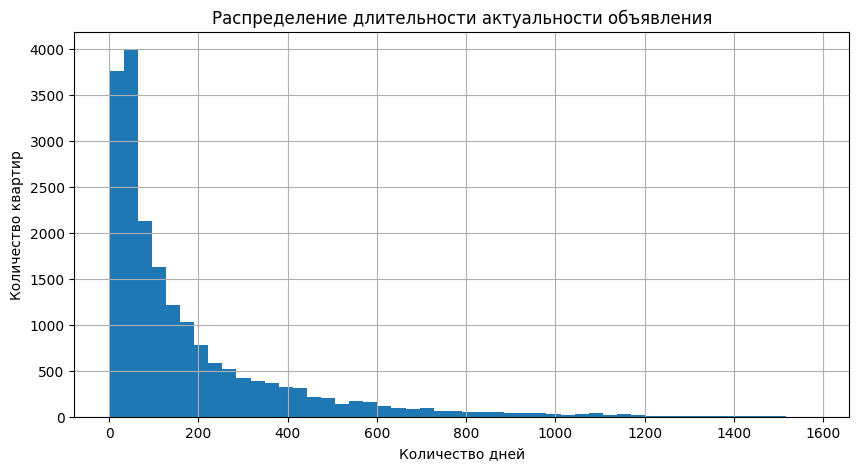

In [113]:
data['days_exposition'].hist(figsize=(10, 5), bins=50)
plt.title('Распределение длительности актуальности объявления')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.show()

Среднее время продажи объекта составляет **175** дней, а медианное время составляет **92** дня, разница практически в два раза. Такую разницу можно объяснить тем, что в выборке присуствуют объекты, которые продаются черевычайно долго, из-за чего происходит смещение среднего значения в большую сторону. 

Исходя из описания данных, можно сделать вывод, что нормальное время продажи объекты составляет от **92** до **175** дней. При этом, продажу, которая уложилась в срок до **44** дней можно считать быстрой, а если объявление было активным более **222** дней, то это долгая продажа. Из графика видно, что квартир, которые продавались более **600** дней крайне мало, а самый долгий случай продажи объекта составил **1580** дней. 

#### Какие факторы влияют на стоимость объекта

Изучим зависимость цены от общей площади (`total_area`).

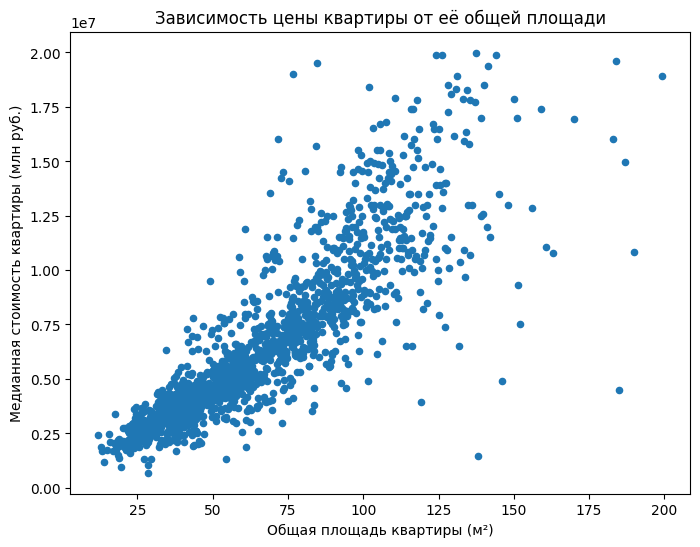

In [114]:
(data
     # подготавливаем данные с помощью сводной таблицы
     .pivot_table(index='total_area', values='last_price', aggfunc='median')
     # изменяем индекс для того, чтобы иметь возможность построить график scatter
     .reset_index()
     # строим график
     .plot(x='total_area', y='last_price', kind='scatter', figsize=(8, 6)) 
)
plt.title('Зависимость цены квартиры от её общей площади')
plt.xlabel('Общая площадь квартиры (м²)')
plt.ylabel('Медианная стоимость квартиры (млн руб.)')
plt.show()

Из-за крупных выбросов, некоторая часть точек сконцентрирована в небольшой области, и все они сливаются в единую массу, но даже на таком графике уже можно заметить восходящий тренд. Ограничим график для большей наглядности.

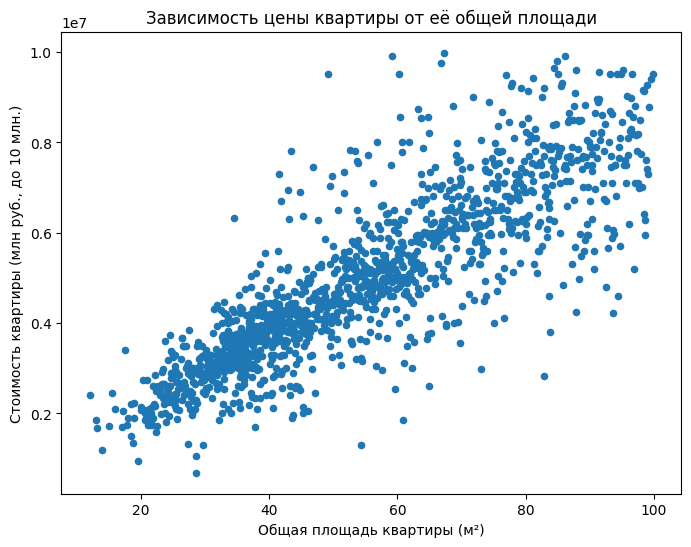

In [115]:
(data
     # ограничиваем размер площади до 100 кв.м и стоимость до 10 млн. рублей
     .query('total_area < 100 and last_price < 10_000_000')
     # подготавливаем данные с помощью сводной таблицы
     .pivot_table(index='total_area', values='last_price', aggfunc='median')
     # изменяем индекс для того, чтобы иметь возможность построить график scatter
     .reset_index()
     # строим график
     .plot(x='total_area', y='last_price', kind='scatter', figsize=(8, 6)) 
)
plt.title('Зависимость цены квартиры от её общей площади')
plt.xlabel('Общая площадь квартиры (м²)')
plt.ylabel('Стоимость квартиры (млн руб., до 10 млн.)')
plt.show()

Такой график воспринимается гораздо проще. На графике прослеживается прямая зависимость цены на объект от его полной площади. Дополнительно убедимся в этом, посчитав коэффициент корреляции Пирсона.

In [116]:
data['total_area'].corr(data['last_price'])

0.7404053558773269

Коэффициент в **0.74** говорит о том, что связь точно есть, причем положительная. Обратив внимание на неограниченный график, можно сказать, что на очень больших показателях площади корреляция заметно снижается. То есть квартира размером примерно в **125** кв.м может стоить, как относительно дешего (если ориентироваться на показатели зависимости на малых значениях), так и гораздо дороже ожидаемого, поэтому предсказать даже приблизительную стоимость таких объектов, ориентируясь лишь на общую площадь, сложно. На данном этапе можно предположить, что общая площадь является одним из важных параметров влияющих на конечную стоимость.

Изучим зависимость цены от жилой площади (`living_area`).

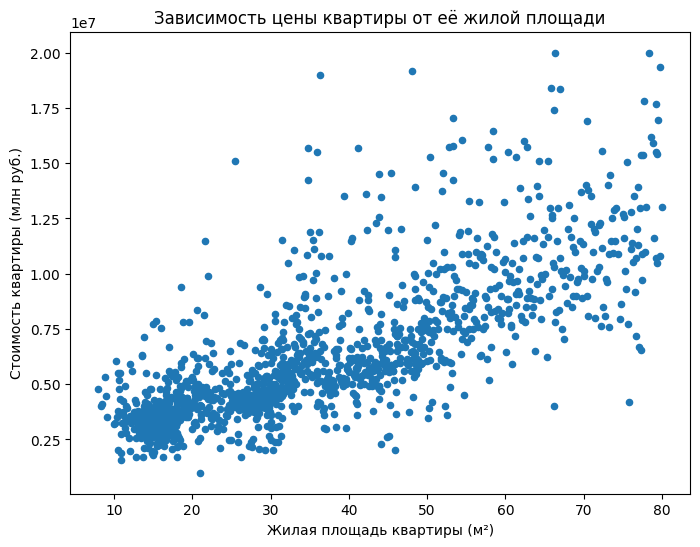

In [117]:
(data
     .pivot_table(index='living_area', values='last_price', aggfunc='median')
     .reset_index()
     .plot(x='living_area', y='last_price', kind='scatter', figsize=(8, 6)) 
)
plt.title('Зависимость цены квартиры от её жилой площади')
plt.xlabel('Жилая площадь квартиры (м²)')
plt.ylabel('Стоимость квартиры (млн руб.)')
plt.show()

На графике можно увидеть положительную зависимость жилой площади от цены. Посчитаем коэффициент корреляции Пирсона.

In [118]:
data['living_area'].corr(data['last_price'])

0.6121458503910874

Корреляция в **0.61** говорит о наличии связи, однако менее сильной, чем в ситуации с общей площадью. График в какой-то степени похож на график с общей площадью. Стоило ожидать чего-то подобного, поскольку жилая площадь — это составная часть общей площади. Осмелимся предположить, что оба этих параметра оказывают влияние на формирование стоимости объекта, однако вклад общей площади в это несколько выше, чем жилой площади.

Изучим зависимость цены от площади кухни (`kitchen_area`).

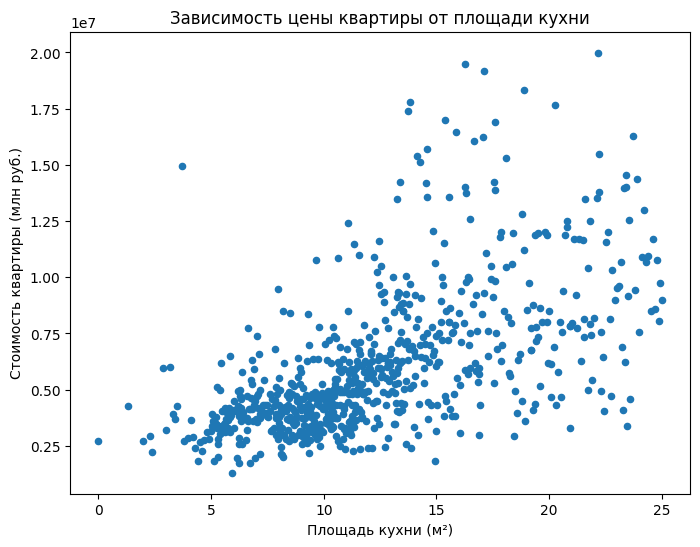

In [119]:
(data
     .pivot_table(index='kitchen_area', values='last_price', aggfunc='median')
     .reset_index()
     .plot(x='kitchen_area', y='last_price', kind='scatter', figsize=(8, 6)) 
)
plt.title('Зависимость цены квартиры от площади кухни')
plt.xlabel('Площадь кухни (м²)')
plt.ylabel('Стоимость квартиры (млн руб.)')
plt.show()

Можно увидеть слабую зависимость цены от площади кухни. Оценим коэффициент корреляции Пирсона.

In [120]:
data['kitchen_area'].corr(data['last_price'])

0.5369062526983975

Коэффициент корреляции в **0.54** подтверждает, что зависимость слабая, однако она присутствует. Это также можно обосновать тем, что площадь кухни является составным компонентом общей площади. Примечательно, что чем меньшую часть занимает какой-то отдельный компонент общей площади, тем ниже коэффициент корреляции Пирсона. Можно предположить, что, например, если бы мы имели в качестве параметра площадь туалетной комнаты, то, скорее всего, он не оказывал бы практически никакого влияния на общую стоимость объекта.

Изучим зависимость цены от количества комнат (`rooms`).

В данном случае для демонстрации зависимости подойдет график, где значения соединяются линиями. С помощью сводной таблицы определим медианные значения цены количеству комнат.

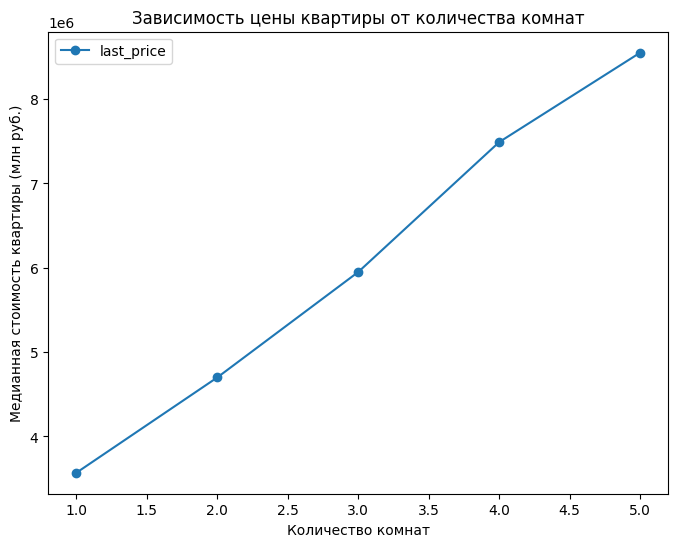

In [121]:
(data
     .pivot_table(index='rooms', values='last_price', aggfunc='median')
     .reset_index()
     .plot(x='rooms', y='last_price', style='o-', figsize=(8, 6)) 
)
plt.title('Зависимость цены квартиры от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Медианная стоимость квартиры (млн руб.)')
plt.show()

Анилизируя график, можно утверждать, что с ростом количества комнат растёт и цена на объект. Однако, как и в ситуации с общей площадью, на очень больших значениях зависимсоть может снижаться. Посчитаем коэффициент корреляции Пирсона.

In [122]:
data['rooms'].corr(data['last_price'])

0.4515082757523727

Коэффициент корреляции в **0.45** говорит о том, что между количеством комнат и ценой на объект не слишком сильная линейная зависимость. В итоге, можно сказать, что медианная цена на объект растёт с увеличением количества комнат, но в целом зависимость цены от количества комнат слабая.

Изучим зависимость цены от этажа (`floor_category`).

In [123]:
data.pivot_table(index='floor_category', values='last_price', aggfunc='median')

,last_price
floor_category,
другой,4650000.0
первый,3850000.0
последний,4150000.0


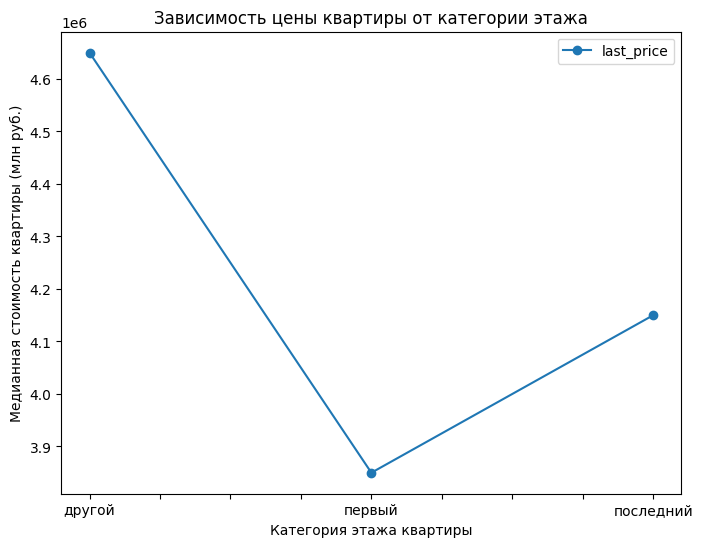

In [124]:
(data
     .pivot_table(index='floor_category', values='last_price', aggfunc='median')
     .reset_index()
     .plot(x='floor_category', y='last_price', style='o-', figsize=(8, 6)) 
)
plt.title('Зависимость цены квартиры от категории этажа')
plt.xlabel('Категория этажа квартиры')
plt.ylabel('Медианная стоимость квартиры (млн руб.)')
plt.show()

Наиболее дорогими являются квартиры между первым и последним этажом, их медианная стоимость **4.7** млн. рублей. Более дешевыми будут квартиры на последнем этаже — **4.2** млн. рублей , а самыми дешевыми являются квартиры, расположенные на первом этаже — **3.9** млн. рублей.

Изучим зависимость цены от дня недели публикации (`week_day_exposition`).

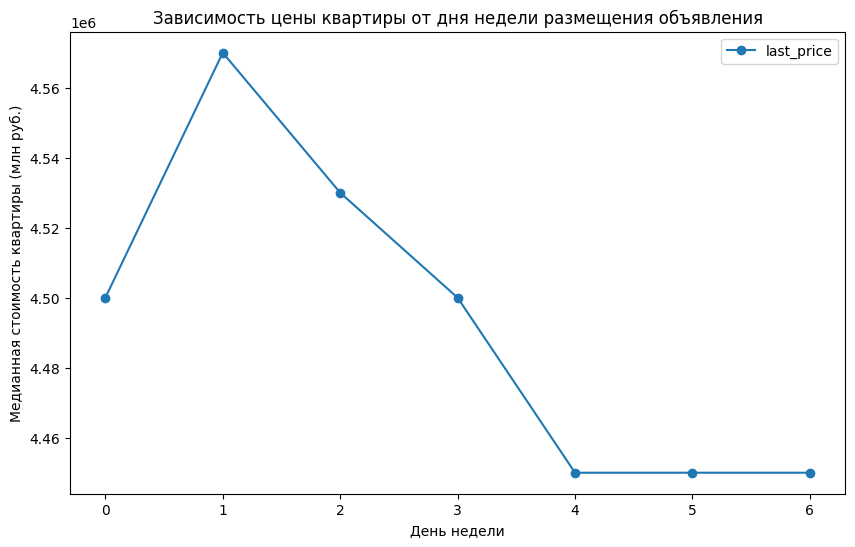

In [125]:
(data
     .pivot_table(index='week_day_exposition', values='last_price', aggfunc='median')
     .reset_index()
     .plot(x='week_day_exposition', y='last_price', style='o-', figsize=(10, 6)) 
)
plt.title('Зависимость цены квартиры от дня недели размещения объявления')
plt.xlabel('День недели')
plt.ylabel('Медианная стоимость квартиры (млн руб.)')
plt.show()

Линейной зависимости не прослеживается.

Изучим зависимость цены от месяца публикации (`month_exposition`).

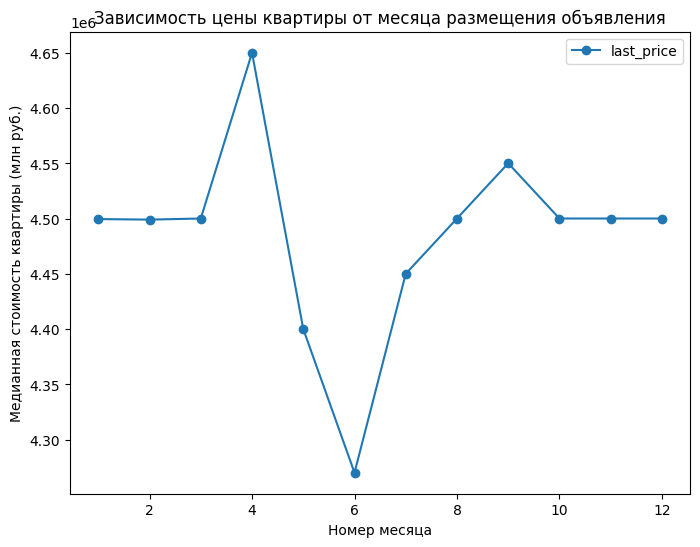

In [126]:
(data
     .pivot_table(index='month_exposition', values='last_price', aggfunc='median')
     .reset_index()
     .plot(x='month_exposition', y='last_price', style='o-', figsize=(8, 6)) 
)
plt.title('Зависимость цены квартиры от месяца размещения объявления')
plt.xlabel('Номер месяца')
plt.ylabel('Медианная стоимость квартиры (млн руб.)')
plt.show()

Линейной зависимости не прослеживается. 

Изучим зависимость цены от года публикации (`year_exposition`).

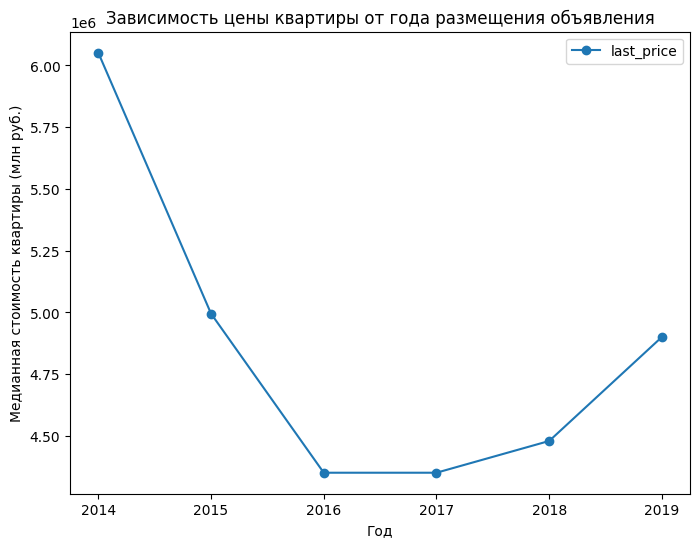

In [127]:
(data
     .pivot_table(index='year_exposition', values='last_price', aggfunc='median')
     .reset_index()
     .plot(x='year_exposition', y='last_price', style='o-', figsize=(8, 6)) 
)
plt.title('Зависимость цены квартиры от года размещения объявления')
plt.xlabel('Год')
plt.ylabel('Медианная стоимость квартиры (млн руб.)')
plt.show()

Можно увидеть сильное снижение цен на квартиры после 2014 года, однако далее ситуация стабилизируется, а затем график вообще разворачивается. В целом, можно говорить, что линейная зависимость стоимости жилья от даты публикации объявления отсутствует.

#### Cредняя цена одного квадратного метра 

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Для начала выведем эти населённые пункты.

In [128]:
data.value_counts('locality_name').head(10)

locality_name
Санкт-Петербург      14396
поселок Мурино         542
поселок Шушары         436
Всеволожск             393
Пушкин                 344
Колпино                335
поселок Парголово      312
Гатчина                303
деревня Кудрово        296
Выборг                 231
dtype: int64

Посчитаем среднее значения квадратного метра с помощью сводной таблицы.

In [129]:
# сводная таблица, в которой считаем кол-во объявлений и среднюю цену за кв.м для всех населенных пунктов
one_m_price_mean = data.pivot_table(index='locality_name', values='one_m_price', aggfunc=['count', 'mean'])
one_m_price_mean.columns = ['count', 'mean']
# сортируем населенные пункты по кол-ву объявлений и отрезаем 10 верхних объектов
sorted_by_count_price = one_m_price_mean.sort_values(by=('count'), ascending=False).head(10)
sorted_by_count_price

,count,mean
locality_name,,
Санкт-Петербург,14396,108505.213809
поселок Мурино,542,85735.745387
поселок Шушары,436,78755.181193
Всеволожск,393,67059.697201
Пушкин,344,101445.017442
Колпино,335,75433.420896
поселок Парголово,312,90129.323718
Гатчина,303,68612.805281
деревня Кудрово,296,92667.665541


Добавим график для наглядности.

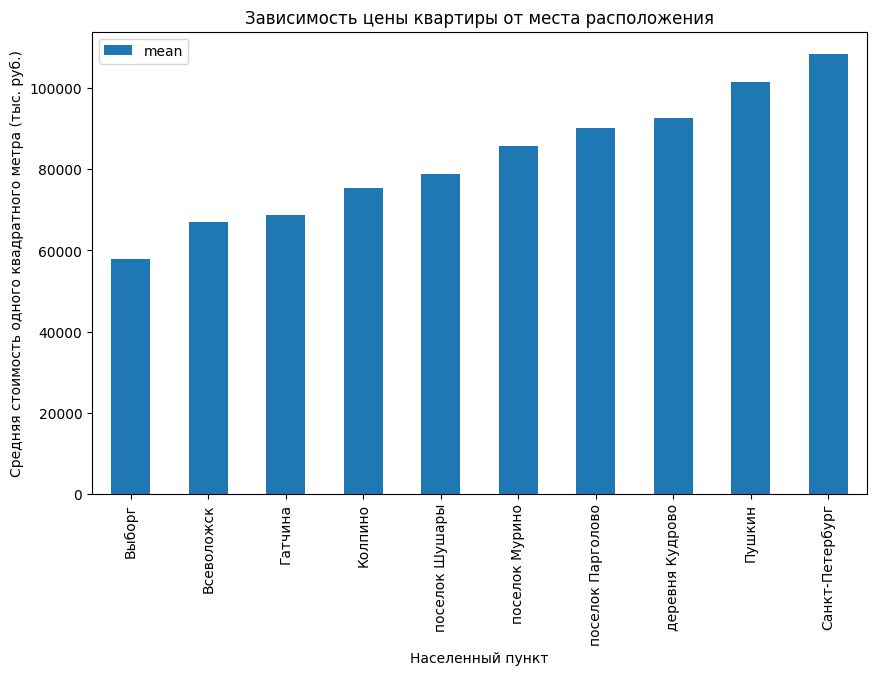

In [138]:
(sorted_by_count_price
     .sort_values(by='mean')
     .reset_index()
     .plot(x='locality_name', y = 'mean', kind='bar', figsize=(10, 6)))
plt.title('Зависимость цены квартиры от места расположения')
plt.xlabel('Населенный пункт')
plt.ylabel('Средняя стоимость одного квадратного метра (тыс. руб.)')
plt.show()

В данном списке наиболее высокая цена за один квадратный метр в Санкт-Петербурге, она составляет **108** тыс. рублей. Самая низкая цена за квадратный метр в Выборге — **58** тыс. рубелй.

#### Средняя цена каждого километра в расстоянии до центра города

Вычислим среднюю цену каждого километра в расстоянии до центра среди квартир в Санкт-Петербурге. Выясним, как стоимость объектов зависит от расстояния до центра города.

Некоторые объекты находятся на растоянии менее одного км до центра, поэтому сначала нам нужно исключить их из выборки, поскольку они образуют нули в столбце `cityCenters_nearest_km`.

In [131]:
data = data[data['cityCenters_nearest_km'] != 0]
len(data)

22177

Датафрейм сократился до **22177** строк. Далее добавим столбец `one_km_to_center_price`, в котором будем хранить цену каждого километра до центра для всех объектов.

In [132]:
data['one_km_to_center_price'] = round(data['last_price'] / data['cityCenters_nearest_km'])
data['one_km_to_center_price'].head()

0    812500.0
1    176316.0
2    371143.0
5         NaN
6    194737.0
Name: one_km_to_center_price, dtype: float64

Выделим данные о Питере в отдельный датафрейм и далее будем работать с ними.

In [133]:
data_spb = data[data['locality_name'] == 'Санкт-Петербург']
len(data_spb)

14384

Вычислим среднюю цену для квартир в Санкт-Петербурге.

In [134]:
data_spb['one_km_to_center_price'].mean()

801054.094205425

Средняя цена каждого километра в расстоянии до центра Санкт-Петербурга составляет **801** тыс. рублей.

Выясним, как стоимость объектов зависит от расстояния до центра города.

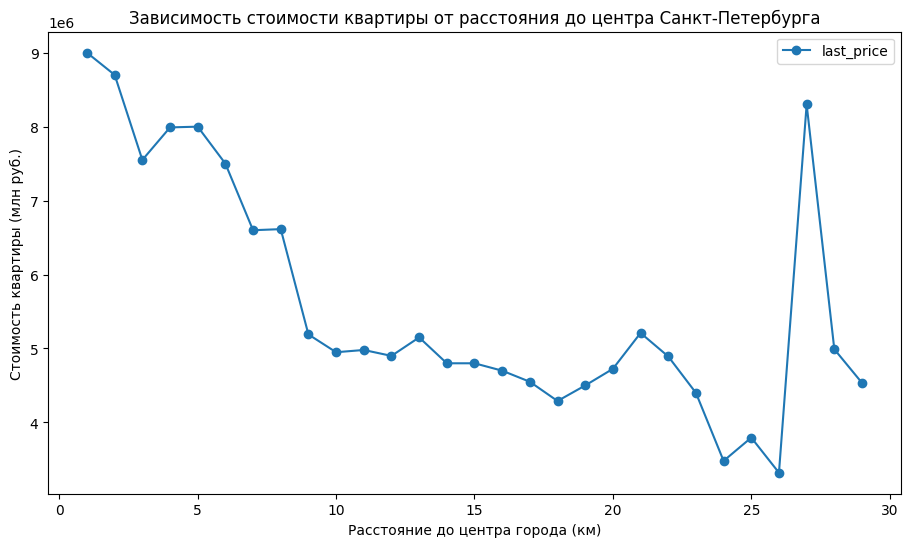

In [135]:
(data_spb
         .pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='median')
         .reset_index()
         .plot(x='cityCenters_nearest_km', y='last_price', style='o-', figsize=(11, 6)) 
)
plt.title('Зависимость стоимости квартиры от расстояния до центра Санкт-Петербурга')
plt.xlabel('Расстояние до центра города (км)')
plt.ylabel('Cтоимость квартиры (млн руб.)')
plt.show()

На графике можно увидеть падение средней цены с ростом удалености от центра, однако присутсвуют объекты, которые имеют высокую стоимость и на расстоянии более **25** км от центра. Оценим коэффициент корреляции.

In [136]:
data_spb['cityCenters_nearest_km'].corr(data_spb['last_price'])

-0.3835396065028314

Коэффициент корреляции Пирсона в **-0.38** подтверждает, что между расстоянием до центра города и конечной ценой на объект присутствует слабая линейная зависимость, причем отрицательная.

**Вывод**


Исследовательский анализ данных прошел в несколько этапов:
- изучены каждый из параметров объектов и определены средние показатели,
- уставлено среднее время продажи объектов,
- уставлены наиболее влияющие на цену объекта параметры,
- посчитана средняя цена квадратного метра в населённых пунктах с наибольшим числом объявлений,
- посчитана средняя цена каждого километра в расстоянии до центра Санкт-Петербурга.

Полученные результаты повторно отразим в общем выводе.

### Общий вывод

В ходе исследования была провдеена работа с архивом объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

На этапе предобработки мы:
- устранили пропущенные значения
- исправили неверные типы данных
- удалили дубликаты
- обработали аномальные значения


Исследуя обработанные данные, удалось выяснить, что:
1. Для среднестатистической квартиры характерны следующие показатели. Размер общей площади — от **50** кв.м до **54** кв.м, размер жилой пплощади — от **30** до **31** кв.м,  размер кухни — **9** кв.м, количество комнат — **2**, высота потолков — **2.7** м, расположенность — между **2** и **8** этажом, расстояние до центра города — от **13** км до **15** км, стоимость — от **4.5** до **5.2** млн. рублей.
2. В среднем квартиры продаются от **92** до **175** дней. 
3. Больше всего на стоимость объекта влияет общая площадь, жилая площадь, площадь кухни и в некотором смысле количество комнат. Также дороже всего продаются квартиры, расположенные не на первом и не на последнем этаже. Можно сказать, что конечную стоимость формирует совокупность перечисленных пунктов. 
4. Дата публикации практически не влияет на цену объекта.
5. В разных населенных пунтках цена за квадратный метр разная. Наиболее высокая цена за один квадратный метр в Санкт-Петербурге, она составляет **108** тыс. рублей. Самая низкая цена за квадратный метр среди населённых пунктов с наибольшим числом объявлений в Выборге — **58** тыс. рубелй.
6. Средняя цена каждого километра в расстоянии до центра в Санкт-Петербурге составляет **801** тыс. рублей. Есть некоторая зависимость между удаленностью объекта от центра и его стоимостью. Приближенные к центру объекты стоят дороже.